# Actividad 4.3 Diagramas de voronoy
**Victor Misael Escalante Alvarado**

In [22]:

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import Voronoi
import scipy.spatial as spatial
import random
import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon
from collections import defaultdict
from shapely.geometry import LineString, Polygon

## Funciones y codigo Previo

### Clases Usaddas para la triangulacion

In [23]:
# Clase para los puntos
class Punto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def show(self):
        return [self.x, self.y]
    
class PuntoConNombre:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y

    def show(self):
        return [self.name, self.x, self.y]

# Clase para los segmentos
class Segmento:
    def __init__(self, A, B):
        self.A = A
        self.B = B

    def show(self):
        return [self.A.x, self.A.y, self.B.x, self.B.y]

# Clase para los triángulos
class Triangulo:
    def __init__(self, puntos):
        self.puntos = puntos
        self.circuncentro, self.circunradio = calcular_circuncentro_y_radio(*puntos)

### Funciones de la tarea anterior

In [24]:
# Calcula circuncentro y circunradio
# Calcula circuncentro y radio
def calcular_circuncentro_y_radio(p1, p2, p3):
    ax, ay = p1.x, p1.y
    bx, by = p2.x, p2.y
    cx, cy = p3.x, p3.y
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    if d == 0:
        return None, None  # Los puntos son colineales
    ux = ((ax**2 + ay**2) * (by - cy) + (bx**2 + by**2) * (cy - ay) + (cx**2 + cy**2) * (ay - by)) / d
    uy = ((ax**2 + ay**2) * (cx - bx) + (bx**2 + by**2) * (ax - cx) + (cx**2 + cy**2) * (bx - ax)) / d
    
    circuncentro = Punto(ux, uy)
    
    radio = np.sqrt((ux - ax)**2 + (uy - ay)**2)
    
    return circuncentro, radio

# Verifica si un punto está dentro o sobre una circunferencia
def punto_dentro_circunferencia(punto, centro, radio):
    distancia = math.sqrt((centro.x - punto.x)**2 + (centro.y - punto.y)**2) # Distancia del punto al circuncentro
    return distancia <= radio  # Retorna True si está dentro del radio


def triangulacion_delaunay(puntos):
    triangulos = []
    for i in range(len(puntos)):
        for j in range(i + 1, len(puntos)):
            for k in range(j + 1, len(puntos)):
                p1, p2, p3 = puntos[i], puntos[j], puntos[k]
                centro, radio = calcular_circuncentro_y_radio(p1, p2, p3)
                if centro is None:
                    continue
                es_delaunay = all(math.sqrt((centro.x - p.x)**2 + (centro.y - p.y)**2) >= radio for p in puntos if p not in [p1, p2, p3])
                if es_delaunay:
                    triangulos.append(Triangulo([p1, p2, p3]))
    return triangulos



### Funciones para graficar

In [25]:
# Funcines para graficar
def graficar_triangulos_y_puntos(puntos, triangulos, deaths):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    for triangulo in triangulos:
        x_values = [punto.x for punto in triangulo.puntos] + [triangulo.puntos[0].x]
        y_values = [punto.y for punto in triangulo.puntos] + [triangulo.puntos[0].y]
        ax.plot(x_values, y_values, 'k-')

    for punto in puntos:
        ax.plot(punto.x, punto.y, 'bo')
        ax.text(punto.x, punto.y, punto.name, fontsize=12, ha='right')
    
    for death in deaths:
        ax.plot(death.x, death.y, 'ro')

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    
    # Establecer límites de la gráfica
    ax.set_xlim(min(punto.x for punto in puntos) - 0.001, max(punto.x for punto in puntos) + 0.001)
    ax.set_ylim(min(punto.y for punto in puntos) - 0.001, max(punto.y for punto in puntos) + 0.001)
    plt.show()

### Funciones para cargar archivos

In [26]:
# Lectura de archivos
def cargar_puntos(archivo):
    puntos = []
    with open(archivo, 'r') as file:
        num_points = int(file.readline().strip())
        for line in file:
            x, y = map(float, line.strip().split())
            puntos.append(Punto(x, y))
    return puntos

def cargar_puntos_name(archivo):
    puntos = []
    with open(archivo, 'r') as file:
        # ignoarmoa la primera linea
        file.readline()
        for line in file:
            name, x, y = line.strip().split(',')
            puntos.append(PuntoConNombre(name, float(x), float(y)))
    return puntos

def cargar_deaths(archivo):
    puntos = []
    with open(archivo, 'r') as file:
        # ignoarmoa la primera linea
        file.readline()
        for line in file:
            name, x, y = line.strip().split(',')
            puntos.append(Punto(float(x), float(y)))
    return puntos

## Funciones y Codigo para el diagrama de voronoi

### Funciones nuevas partiendo de una triangulacion

**Tomada de la dualidad de la triangulacion de delaunay (incrementaal)**

**Mismo algoritmo de fortune pero con la libreria**

### grafica pero mas de cerca

In [27]:
def graficar_diagrama_voronoi(puntos, segmentos_voronoi):
    fig, ax = plt.subplots(figsize=(6, 8))

    # Dibujar puntos de la ciudad (excluyendo los puntos límite)
    for punto in puntos:
        ax.plot(punto.x, punto.y, 'bo')  # Puntos en azul
        ax.text(punto.x, punto.y, f'{punto.x:.5f}, {punto.y:.5f}', fontsize=8, ha='right')


    # Dibujar segmentos de Voronoi
    for segmento in segmentos_voronoi:
        (p1, p2) = segmento
        ax.plot([p1.x, p2.x], [p1.y, p2.y], 'k-', lw=1)  # Segmentos en negro

    # Dibujar el super cuadrado como borde
    
    

    # Configurar ejes y mostrar el gráfico
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_aspect('equal', adjustable='box')
    # Establecer límites de la gráfica
    ax.set_xlim(min(punto.x for punto in puntos) - 0.01, max(punto.x for punto in puntos) + 0.01)
    ax.set_ylim(min(punto.y for punto in puntos) - 0.01, max(punto.y for punto in puntos) + 0.01)
    plt.show()


### Codigo de la triangulacion y dagrama

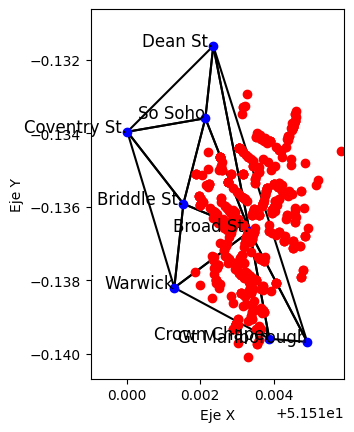

In [28]:

# ---- Inicio del código ---- #
# nombre del archivo
archivo_pumps = "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/pumps.csv"
archivo_deaths = "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/deaths.csv"



puntos_name = cargar_puntos_name(archivo_pumps)
puntos_deaths = cargar_deaths(archivo_deaths)

#iniciamos los puntos con los limites de la ciudad

#puntos = [Punto(0,-0.140), Punto(0,-0.130), Punto(0.006,-0.140)]
puntos = []
for punto in puntos_name:
    puntos.append(Punto(punto.x, punto.y))

triangulos = triangulacion_delaunay(puntos)


graficar_triangulos_y_puntos(puntos_name, triangulos, puntos_deaths)

# Crear puntos límite para el super cuadrado



